# Sets Analysis

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np

## Subset of citations

In [2]:
all_citations = pd.read_csv('../inputdata/all_cases_citations.csv')
print('Total citations relations EUR-LEX: ',len(all_citations))

Total citations relations EUR-LEX:  43780


In [3]:
sampled_cases = pd.read_csv('../inputdata/sampled_cases.csv').rename(columns={'source':'case'})
print('Total sampled cases for the study: ',len(sampled_cases))

Total sampled cases for the study:  177


In [4]:
sampled_cases.head()

,quantile,case,citations,topic
0,1.00,61990CJ0006,43,social policy
1,1.00,62003CJ0453,32,public health
2,0.99,62007CJ0378,32,social policy
3,0.98,61995CJ0261,19,social policy
4,1.00,62000CJ0465,17,data protection


Taking the subset of the whole citations files where the target or the source is in the sample

In [5]:
all_citations['sample_in_source'] = [1 if i in list(sampled_cases.case) else 0 for i in all_citations['source']]
all_citations['sample_in_target'] = [1 if i in list(sampled_cases.case) else 0 for i in all_citations['target']]

In [6]:
citations_subset = all_citations[(all_citations['sample_in_source'] == 1) | (all_citations['sample_in_target'] == 1)]

In [7]:
print('Total citations relations sampled from EUR-LEX: ',len(citations_subset))

Total citations relations sampled from EUR-LEX:  1174


In [59]:
#Creating all unique nodes of the graph (this nodes catakogue works for both graphs)
def df_to_json_nodes(df_relations, df_attributes, node_name = 'case'):
    """"Assumes the columns are called source and target"""
    nodes_list = []; nodes = pd.DataFrame()
    nodes_list.extend(list(df_relations.source.unique()))
    nodes_list.extend(list(df_relations.target.unique()))
    nodes[str(node_name)] = list(set(nodes_list))
    nodes = pd.merge(nodes, df_attributes, how='left').fillna('NA')
    nodes = nodes.set_index(str(node_name)).to_dict('index')
    return nodes

---
## Citations Graph

In [8]:
citations_subset.head()

,source,target,sample_in_source,sample_in_target
188,62016CJ0384,61962CJ0025,1,0
286,62007CO0073,61964CO0006,1,0
334,61996CJ0416,61965CJ0061,1,0
404,61996CJ0050,61968CJ0014,1,0
535,61987CJ0187,61970CJ0009,1,0


In [66]:
nodes = df_to_json_nodes(citations_subset, sampled_cases[['case','topic']])

In [10]:
g = nx.from_pandas_edgelist(citations_subset[['source','target']], 'source', 'target')#, create_using = nx.DiGraph)
nx.set_node_attributes(g, nodes)

In [11]:
pos = nx.spring_layout(g)

In [12]:
#only the sampled nodes have attributes
#g.nodes()['61973CJ0039']

In [13]:
#Graph description
N_nodes, N_edges = g.order(), g.size()
avg_deg = float(N_nodes)/N_edges
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(N_nodes, N_edges, avg_deg) )

Nodes: 1031
Edges: 1172
Avg Degree: 0.8796928327645052


In [14]:
#all draws https://networkx.github.io/documentation/networkx-2.2/reference/drawing.html

In [15]:
#https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html

In [84]:
#goupings the colors
def groups(g):
    group0 = []
    group1 = []
    group2 = []
    group3 = []
    for n in g.nodes():
        if g.node[str(n)]['topic'] == "NA":
            group0.append(n)
        elif g.node[str(n)]['topic'] == "social policy":
            group1.append(n)
        elif g.node[str(n)]['topic'] == "public health":
            group2.append(n)
        elif g.node[str(n)]['topic'] == "data protection":
            group3.append(n)
        else:
            print(n)
    return group0, group1, group2, group3

In [85]:
g_0, g_1, g_2, g_3 = groups(g)

In [86]:
len(g_0)+len(g_1)+len(g_2)+len(g_3) == len(g.nodes())

True

Positions

In [87]:
#pos

In [88]:
#move group 3 to the right (green)
#xmult = 2
#for i in group3:
#    pos[str(i)] = pos[str(i)]*np.array([xmult, 1])

In [89]:
#move group2 up
#xmult = 2; 
#ymult= 1.2
#for i in group2:
#    pos[str(i)] = pos[str(i)]*np.array([1, ymult])

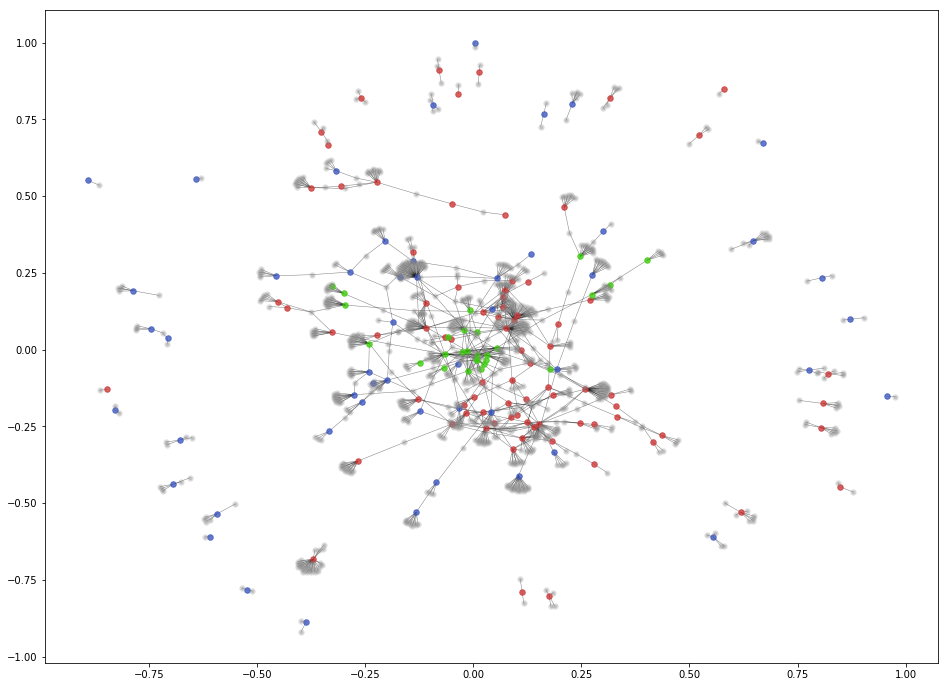

In [90]:
plt.figure(figsize=(16, 12))
#pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g,pos,
                       nodelist=g_1,
                       node_color="#cc3939",
                       node_size=30,
                       alpha=0.8)
nx.draw_networkx_nodes(g,pos,
                       nodelist=g_2,
                       node_color="#3f59bf",
                       node_size=30,
                       alpha=0.8)
nx.draw_networkx_nodes(g,pos,
                       nodelist=g_3,
                       node_color="#3ecc0e",
                       node_size=30,
                       alpha=0.8)
nx.draw_networkx_nodes(g,pos,
                       nodelist=g_0,
                       node_color="#878787",
                       node_size=10,
                       linewidths = 3,
                       alpha=0.3)
nx.draw_networkx_edges(g,pos,width=0.5,alpha=0.5, arrows=False, arrowstyle="Arc3, rad=-0.2") #angleA=90, angleB=0, rad=0.0
plt.show()

---
## Similarity Graph

In [22]:
casses_similarity = pd.read_csv('../outputdata/results.csv')

In [23]:
casses_similarity.head()

,source_case,similar_case,similarity_score,method,citation_link,source_case_topic
0,62003CJ0453,62006CO0421,0.727373,tfidf,True,public health
1,62003CJ0453,61984CJ0028,0.664869,tfidf,False,public health
2,62003CJ0453,61984CJ0195,0.618935,tfidf,False,public health
3,62003CJ0453,61990CJ0039,0.579735,tfidf,False,public health
4,62003CJ0453,62002CJ0145,0.566752,tfidf,False,public health


In [24]:
#are the same
#len(casses_similarity['source_case'].unique())
#len(sampled_cases)

#### filtering top 5 similar and the relevant algorithms

- tfidf
- doc2vec vector size = 256 (Cosine Similarity)
- Law2Vec ( Cosine Similarity)

In [25]:
cases_sim_sorted = casses_similarity.sort_values(
    ['source_case','method','similarity_score'],ascending=False).reset_index()

In [28]:
tops5 = []
m=12034; n=10
for n in list(range(n, (m+1)*n, n)):
    tops5.append([i+n for i in [0,1,2,3,4]])
tops5 = [item for s in tops5 for item in s]
tops5.extend([0,1,2,3,4])

In [30]:
len(tops5)

60175

In [52]:
cases_similarity_top5 = cases_sim_sorted[cases_sim_sorted.index.isin(tops5)]\
    .rename(columns = {'source_case':'source', 'similar_case':'target'})

In [70]:
cases_similarity_filter = cases_similarity_top5[(cases_similarity_top5['method'] == 'tfidf') |
                                                (cases_similarity_top5['method'] == 'doc2vec_256')]

cases_similarity_filter = cases_similarity_top5[(cases_similarity_top5['method'] == 'tfidf') |
                                                (cases_similarity_top5['method'] == 'doc2vec_256')]

In [72]:
len(cases_similarity_filter)#.head()

3540

In [73]:
nodes2 = df_to_json_nodes(cases_similarity_filter, sampled_cases[['case','topic']])#cases_similarity_filter

In [74]:
g2 = nx.from_pandas_edgelist(cases_similarity_filter, 'source', 'target', edge_attr='similarity_score')
nx.set_node_attributes(g2, nodes2)

In [93]:
#pos2 = nx.kamada_kawai_layout(g2)
pos2 = nx.spring_layout(g2)

In [94]:
#Graph description
N_nodes2, N_edges2 = g2.order(), g2.size()
avg_deg2 = float(N_nodes2)/N_edges2
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(N_nodes2, N_edges2, avg_deg2) )

Nodes: 2362
Edges: 3415
Avg Degree: 0.6916544655929722


In [95]:
g2_0, g2_1, g2_2, g2_3 = groups(g2)

In [96]:
len(g2_0)+len(g2_1)+len(g2_2)+len(g2_3) == len(g2.nodes())

True

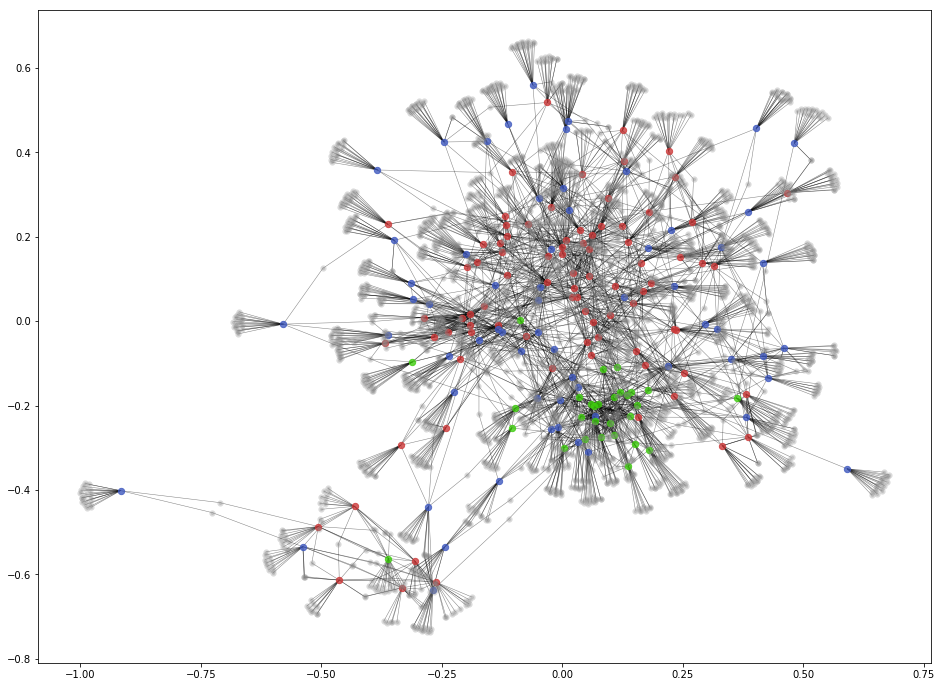

In [97]:
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(g2,pos2,
                       nodelist=g2_1,
                       node_color="#cc3939",
                       node_size=40,
                       alpha=0.8)
nx.draw_networkx_nodes(g2,pos2,
                       nodelist=g2_2,
                       node_color="#3f59bf",
                       node_size=40,
                       alpha=0.8)
nx.draw_networkx_nodes(g2,pos2,
                       nodelist=g2_3,
                       node_color="#3ecc0e",
                       node_size=40,
                       alpha=0.8)
nx.draw_networkx_nodes(g2,pos2,
                       nodelist=g2_0,
                       node_color="#878787",
                       node_size=10,
                       linewidths = 3,
                       alpha=0.3)
nx.draw_networkx_edges(g2,pos2,width=0.5,alpha=0.5, arrows=False, arrowstyle="Arc3, rad=-0.2") #angleA=90, angleB=0, rad=0.0
plt.show()

In [ ]:
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')

In [106]:
g.edges([('62016CJ0384', '61962CJ0025'), ('62016CJ0384', '62003CJ0182')])

EdgeDataView([])

In [108]:
#g.edges.data() 

In [109]:
#for n in g.nodes():
#    print(g.node[str(n)]['topic'])

---
## Intersection Graph

In [46]:
table_sim = cases_similarity_top4[['source_case','similar_case','similarity_score','method','citation_link']].rename(
columns = {'source_case':'source','similar_case':'target',})

table_cit = citations_subset
table_cit['similarity_score'] = 0
table_cit['method'] = 'NoMethod'
table_cit['citation_link'] = True

inter_table = table_sim.append(table_cit)

In [47]:
inter_table.tail()

,source,target,similarity_score,method,citation_link
604,62017CO0232,62016CJ0519,0.0,NoMethod,True
605,62017CO0259,62016CJ0519,0.0,NoMethod,True
606,62016CJ0349,62016CO0508,0.0,NoMethod,True
607,62017CJ0111,62016CO0508,0.0,NoMethod,True
608,62017CJ0566,62017CJ0068,0.0,NoMethod,True


In [31]:
inter_table_pivot = pd.pivot_table(inter_table, 
                                   values='similarity_score', 
                                   index='target', 
                                   columns='source',
                                   aggfunc=np.mean)

In [32]:
inter_table_pivot.head()

source,61973CJ0039,61975CJ0004,61975CJ0043,61976CJ0089,61980CJ0132,61980CJ0272,61982CJ0174,61982CJ0314,61983CJ0001,61983CJ0037,...,62017CJ0573,62017CJ0581,62017CJ0619,62017CJ0620,62017CJ0634,62017CJ0713,62017CO0232,62017CO0259,62017CO0315,62018CO0780
target,,,,,,,,,,,,,,,,,,,,,
61954CJ0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61954CJ0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61954CJ0006,0.649365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61954CJ0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61954CJ0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


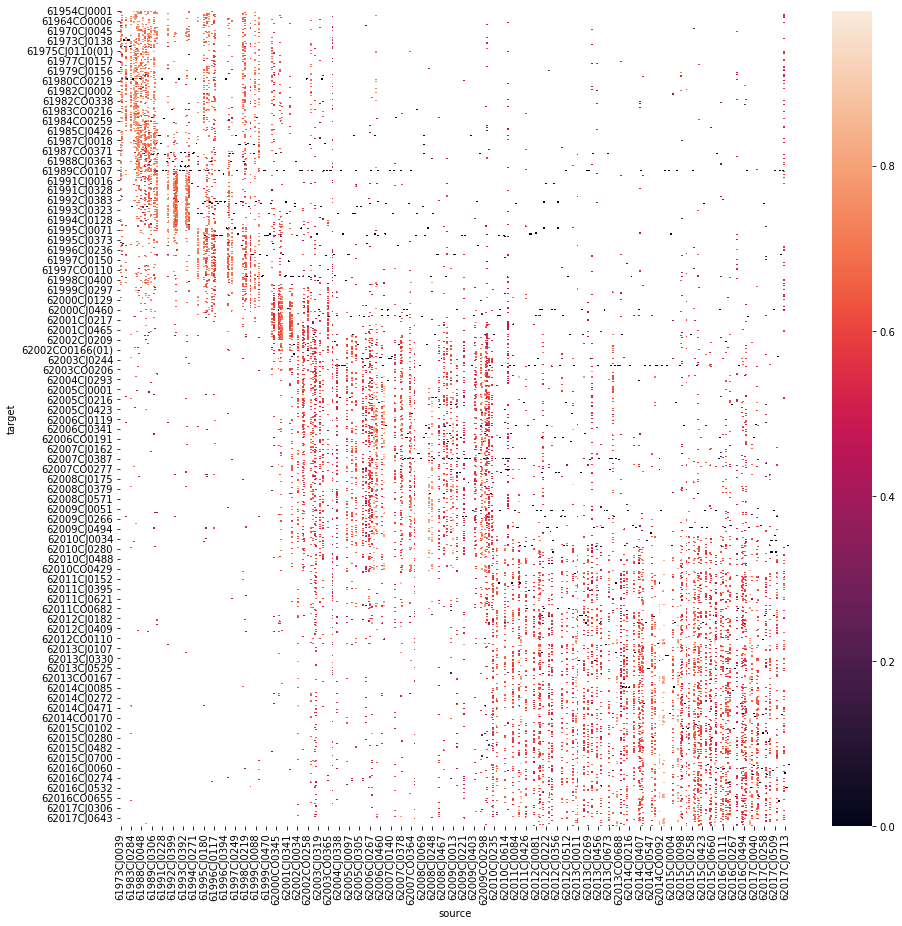

In [33]:
plt.figure(figsize=(15, 15))
sns.heatmap(inter_table_pivot)

In [66]:
summary_methods = inter_table\
    .groupby(['citation_link','method'])\
    .count()['target']\
    .reset_index()\
    .rename(columns={'target':'count'})\
    .sort_values('count', ascending=False)

In [67]:
summary_methods[summary_methods['citation_link']==True].head(10)

,citation_link,method,count
34,True,NoMethod,609
68,True,tfidf,190
42,True,doc2vec_256_10,22
41,True,doc2vec_256,20
36,True,doc2vec_128_10,19
35,True,doc2vec_128,18
52,True,doc2vec_256_e5,18
49,True,doc2vec_256_20_e10,17
51,True,doc2vec_256_e10,17
45,True,doc2vec_256_15,16


In [94]:
summary_methods[summary_methods['citation_link']==False].head(10)

,citation_link,method,count,method_ext
20,False,doc2vec_300_15_e5,1410,doc2vec
23,False,doc2vec_300_20_e5,1410,doc2vec
12,False,doc2vec_256_15_e5,1410,doc2vec
19,False,doc2vec_300_15_e10,1408,doc2vec
8,False,doc2vec_256_10_e10,1406,doc2vec
26,False,doc2vec_512_15_e5,1406,doc2vec
15,False,doc2vec_256_20_e5,1406,doc2vec
29,False,doc2vec_64_10_e10,1406,doc2vec_64
32,False,doc2vec_64_e5,1405,doc2vec_64
22,False,doc2vec_300_20_e10,1405,doc2vec


In [86]:
method_ext = []
for i in summary_methods["method"]:
    if i == 'tfidf':
        method_ext.append(i)
    elif i == 'NoMethod':
        method_ext.append(i)
    elif i.find("64") != -1:
        method_ext.append("doc2vec_64")
    else:
        method_ext.append("doc2vec")
summary_methods['method_ext'] = method_ext

In [92]:
summary_methods.groupby('method_ext').sum()

,citation_link,count
method_ext,,
NoMethod,1.0,609
doc2vec,27.0,38228
doc2vec_64,6.0,8496
tfidf,1.0,1416


---

In [34]:
cases_similarity_top4_link = cases_similarity_top4[
    cases_similarity_top4['citation_link'] == True].sort_values('source_case_topic')

In [35]:
len(cases_similarity_top4_link)

628

In [36]:
g3 = nx.from_pandas_edgelist(cases_similarity_top4_link, 'source_case', 'similar_case')
nx.set_node_attributes(g3, nodes)

In [37]:
#Graph description
N_nodes3, N_edges3 = g3.order(), g3.size()
avg_deg3 = float(N_nodes3)/N_edges3
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(N_nodes3, N_edges3, avg_deg3) )

Nodes: 280
Edges: 219
Avg Degree: 1.278538812785388


In [38]:
node_colors3 = [find_color(node) for node in g3.nodes()]

/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


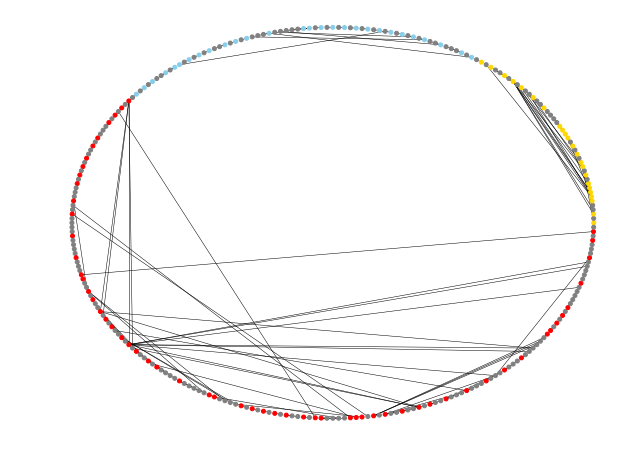

In [39]:
plt.figure(figsize=(8, 6))
nx.draw_circular(g3, with_labels=False, node_size=16, width=0.5, node_color=node_colors3)
plt.show()

---